# Criogéis de nanocelulose anionicos
## Métricas de tamanho de poro e parede

In [1]:
import porespy as ps
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

from skimage import io, filters, morphology, measure, exposure, segmentation, feature, util
from skimage.filters import threshold_otsu, threshold_li, threshold_triangle, rank
from scipy import ndimage as ndi

import tomopy

#### Umidade relativa de 20%

Found 100 slices
Stack shape: (100, 1330, 1330) dtype: float64


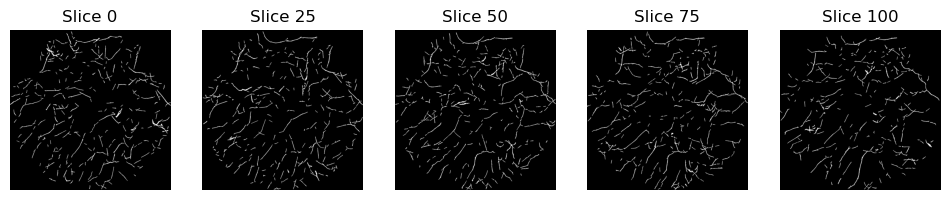

In [2]:
# ---- CONFIG ----
DATA_DIR = Path("data/A20A/mask")  # <-- TODO: set this
PATTERN = "*.png"                        # e.g., '*.tif' or '*.png'
READ_AS_FLOAT = True                     # convert to float in [0, 1]

# Optional: restrict to a subset for quicker iteration (e.g., every 5th slice)
#STRIDE = 3      # use 1 for all slices
#N_SLICES = 100  # e.g., 200 for quick tests, or None to read all

# ---- Load file list ----
files = sorted(DATA_DIR.glob(PATTERN))
n = len(files)
# if MAX_SLICES is not None:
#     files = files[:MAX_SLICES]
# files = files[::STRIDE]

indices = np.linspace(0, 100, 100, dtype=int)
files = [files[i] for i in indices]

print(f"Found {len(files)} slices")

# ---- Load stack ----
if len(files) == 0:
    raise FileNotFoundError("No files found. Check DATA_DIR and PATTERN.")

stack20 = io.imread_collection([str(f) for f in files]).concatenate()
if READ_AS_FLOAT:
    stack20 = util.img_as_float(stack20)

print("Stack shape:", stack20.shape, "dtype:", stack20.dtype)

# Quick peek
mid = stack20.shape[0] // 2
quart = mid//2
fig, axes = plt.subplots(1,5, figsize=(12,4))
axes[0].imshow(stack20[0], cmap="gray"); axes[0].set_title(f"Slice {indices[0]}"); axes[0].axis("off")
axes[1].imshow(stack20[quart], cmap="gray"); axes[1].set_title(f"Slice {indices[quart]}"); axes[1].axis("off")
axes[2].imshow(stack20[mid], cmap="gray"); axes[2].set_title(f"Slice {indices[mid]}"); axes[2].axis("off")
axes[3].imshow(stack20[mid+quart], cmap="gray"); axes[3].set_title(f"Slice {indices[mid+quart]}"); axes[3].axis("off")
axes[4].imshow(stack20[-1], cmap="gray"); axes[4].set_title(f"Slice {indices[-1]}"); axes[4].axis("off")
plt.show()

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integer

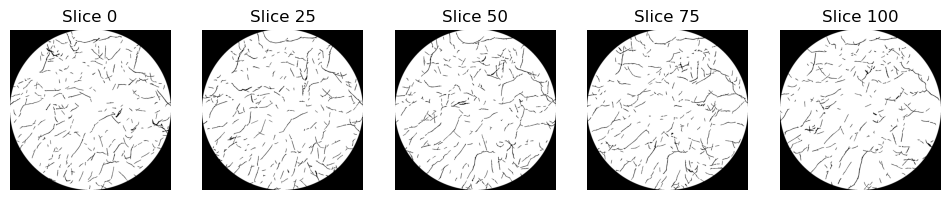

In [3]:
stack20_bool =  stack20.astype(bool)
kcats20_bool = ~stack20_bool
kcats20_bool = tomopy.circ_mask(kcats20_bool, axis=0, ratio=1.0)
kcats20 = kcats20_bool.astype(int) 

# Quick peek
mid = kcats20.shape[0] // 2
quart = mid//2
fig, axes = plt.subplots(1,5, figsize=(12,4))
axes[0].imshow(kcats20[0], cmap="gray"); axes[0].set_title(f"Slice {indices[0]}"); axes[0].axis("off")
axes[1].imshow(kcats20[quart], cmap="gray"); axes[1].set_title(f"Slice {indices[quart]}"); axes[1].axis("off")
axes[2].imshow(kcats20[mid], cmap="gray"); axes[2].set_title(f"Slice {indices[mid]}"); axes[2].axis("off")
axes[3].imshow(kcats20[mid+quart], cmap="gray"); axes[3].set_title(f"Slice {indices[mid+quart]}"); axes[3].axis("off")
axes[4].imshow(kcats20[-1], cmap="gray"); axes[4].set_title(f"Slice {indices[-1]}"); axes[4].axis("off")
plt.show()

#### Umidade relativa de 80%

Found 100 slices
Stack shape: (100, 1330, 1330) dtype: float64


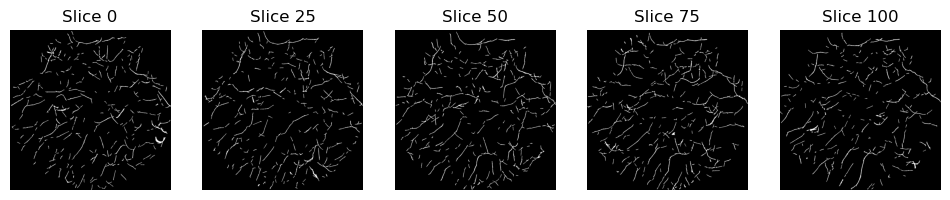

In [4]:
# ---- CONFIG ----
DATA_DIR = Path("data/A80/mask")  # <-- TODO: set this
PATTERN = "*.png"                        # e.g., '*.tif' or '*.png'
READ_AS_FLOAT = True                     # convert to float in [0, 1]

# Optional: restrict to a subset for quicker iteration (e.g., every 5th slice)
#STRIDE = 3      # use 1 for all slices
N_SLICES = 100  # e.g., 200 for quick tests, or None to read all

# ---- Load file list ----
files = sorted(DATA_DIR.glob(PATTERN))
n = len(files)
# if MAX_SLICES is not None:
#     files = files[:MAX_SLICES]
# files = files[::STRIDE]

indices = np.linspace(0, 100, 100, dtype=int)
files = [files[i] for i in indices]

print(f"Found {len(files)} slices")

# ---- Load stack ----
if len(files) == 0:
    raise FileNotFoundError("No files found. Check DATA_DIR and PATTERN.")

stack80 = io.imread_collection([str(f) for f in files]).concatenate()
if READ_AS_FLOAT:
    stack80 = util.img_as_float(stack80)

print("Stack shape:", stack80.shape, "dtype:", stack80.dtype)

# Quick peek
mid = stack80.shape[0] // 2
quart = mid//2
fig, axes = plt.subplots(1,5, figsize=(12,4))
axes[0].imshow(stack80[0], cmap="gray"); axes[0].set_title(f"Slice {indices[0]}"); axes[0].axis("off")
axes[1].imshow(stack80[quart], cmap="gray"); axes[1].set_title(f"Slice {indices[quart]}"); axes[1].axis("off")
axes[2].imshow(stack80[mid], cmap="gray"); axes[2].set_title(f"Slice {indices[mid]}"); axes[2].axis("off")
axes[3].imshow(stack80[mid+quart], cmap="gray"); axes[3].set_title(f"Slice {indices[mid+quart]}"); axes[3].axis("off")
axes[4].imshow(stack80[-1], cmap="gray"); axes[4].set_title(f"Slice {indices[-1]}"); axes[4].axis("off")
plt.show()

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integer

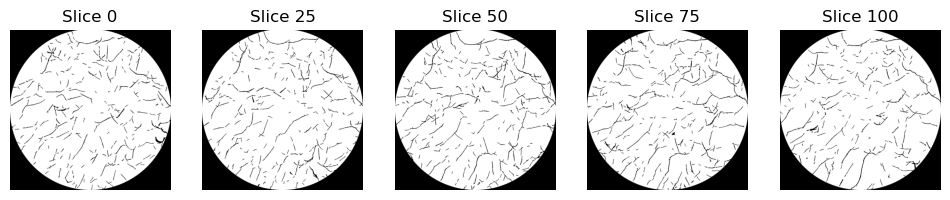

In [5]:
stack80_bool =  stack80.astype(bool)
kcats80_bool = ~stack80_bool
kcats80_bool = tomopy.circ_mask(kcats80_bool, axis=0, ratio=1.0)
kcats80 = kcats80_bool.astype(int) 

# Quick peek
mid = kcats80.shape[0] // 2
quart = mid//2
fig, axes = plt.subplots(1,5, figsize=(12,4))
axes[0].imshow(kcats80[0], cmap="gray"); axes[0].set_title(f"Slice {indices[0]}"); axes[0].axis("off")
axes[1].imshow(kcats80[quart], cmap="gray"); axes[1].set_title(f"Slice {indices[quart]}"); axes[1].axis("off")
axes[2].imshow(kcats80[mid], cmap="gray"); axes[2].set_title(f"Slice {indices[mid]}"); axes[2].axis("off")
axes[3].imshow(kcats80[mid+quart], cmap="gray"); axes[3].set_title(f"Slice {indices[mid+quart]}"); axes[3].axis("off")
axes[4].imshow(kcats80[-1], cmap="gray"); axes[4].set_title(f"Slice {indices[-1]}"); axes[4].axis("off")
plt.show()

### Region Props

In [6]:
im20 = stack20.copy()
im80 = stack80.copy()
mi20 = kcats20.copy()
mi80 = kcats80.copy()

snow20 = ps.filters.snow_partitioning(im = im20)
regions20 = snow20.regions*snow20.im

snow80 = ps.filters.snow_partitioning(im = im80)
regions80 = snow80.regions*snow80.im

wons20 = ps.filters.snow_partitioning(im = mi20)
snoiger20 = wons20.regions*wons20.im

wons80 = ps.filters.snow_partitioning(im = mi80)
snoiger80 = wons80.regions*wons80.im

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [7]:
props20 = ps.metrics.regionprops_3D(snoiger20)
props80 = ps.metrics.regionprops_3D(snoiger80)

df20 = ps.metrics.props_to_DataFrame(props20)
df80 = ps.metrics.props_to_DataFrame(props80)

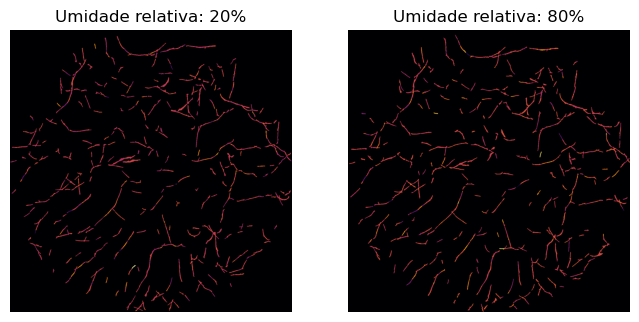

In [8]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(regions20[mid], cmap = "inferno")#, cmap="gray")
ax[0].axis(False)
ax[0].set_title('Umidade relativa: 20%')
ax[1].imshow(regions80[mid], cmap = "inferno")#, cmap="gray")
ax[1].axis(False)
ax[1].set_title('Umidade relativa: 80%')
plt.show()

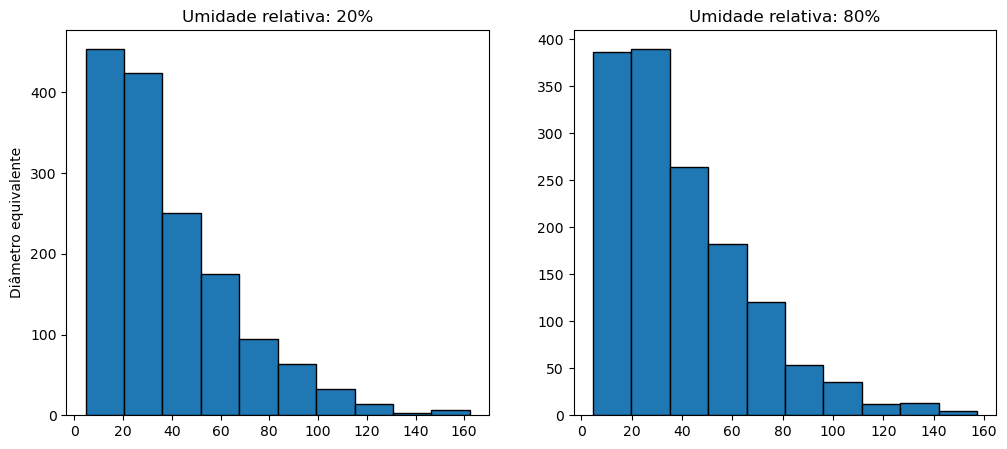

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].hist(df20['equivalent_diameter_area'], edgecolor="k")
ax[0].set_ylabel("Diâmetro equivalente")
ax[0].set_title("Umidade relativa: 20%")
ax[1].hist(df80['equivalent_diameter_area'], edgecolor="k")
ax[1].set_title("Umidade relativa: 80%");

In [10]:
bar_width0 = 10000  
x20_min = min(df20['equivalent_diameter_area'])
x20_max = max(df20['equivalent_diameter_area'])
bins00 = np.arange(x20_min, x20_max + bar_width0, bar_width0)
x80_min = min(df80['equivalent_diameter_area'])
x80_max = max(df80['equivalent_diameter_area'])
bins01 = np.arange(x80_min, x80_max + bar_width0, bar_width0)

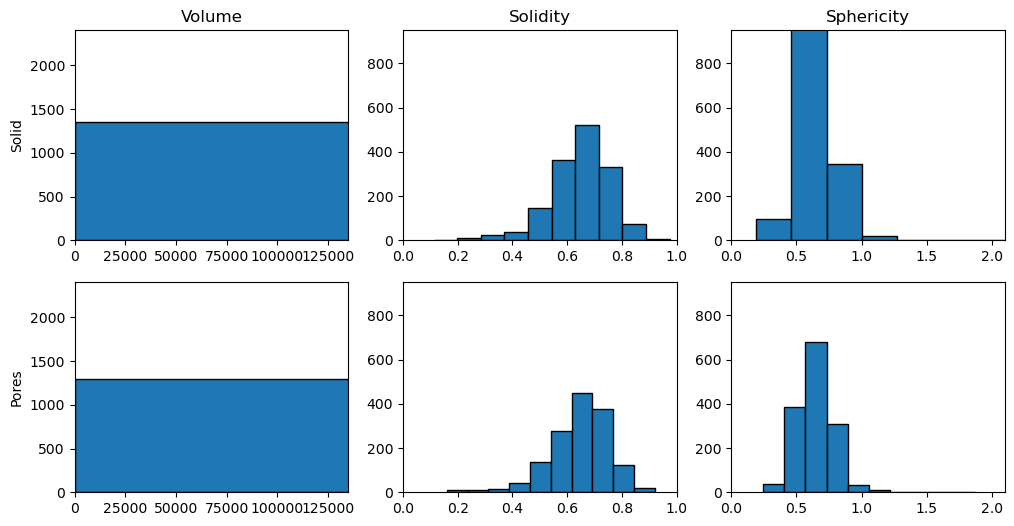

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
ax[0,0].hist(df20['volume'], edgecolor="k")
ax[0,1].hist(df20['solidity'], edgecolor="k")
ax[0,2].hist(df20['sphericity'], edgecolor="k")
# ax[0,0].set_xlim(0,135000)
# ax[0,0].set_ylim(0,2400)
# ax[0,1].set_xlim(0,1)
# ax[0,1].set_ylim(0,950)
# ax[0,2].set_xlim(0,2.1)
# ax[0,2].set_ylim(0,950)
ax[0,0].set_title("Volume")
ax[0,1].set_title("Solidity")
ax[0,2].set_title("Sphericity")
ax[0,0].set_ylabel("Solid")
ax[1,0].hist(df80['volume'], edgecolor="k")
ax[1,1].hist(df80['solidity'], edgecolor="k")
ax[1,2].hist(df80['sphericity'], edgecolor="k")
# ax[1,0].set_xlim(0,135000)
# ax[1,0].set_ylim(0,2400)
# ax[1,1].set_xlim(0,1)
# ax[1,1].set_ylim(0,950)
# ax[1,2].set_xlim(0,2.1)
# ax[1,2].set_ylim(0,950)
ax[1,0].set_ylabel("Pores");

In [12]:
df20.to_csv("A20_poros_regionprops.txt", sep = '\t', index = False)
df80.to_csv("A80_poros_regionprops.txt", sep = '\t', index = False)